# RIDGE REGRESSION 

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [14]:
df = pd.read_csv('clean_and_encoded_df.csv')

baseline_cols = ["Country", "Job_type", "Education", "Company_size", "Age", "Work_experience", "Annual_salary"]

# Add Job_title columns to the baseline_cols list
Job_title = ['Developer, game or graphics', 'Blockchain', 'Developer, QA or test', 'Developer, back-end', 'Student', 
             'Project manager', 'Data or business analyst', 'Cloud infrastructure engineer', 'Engineer, data', 
             'Educator', 'Developer, desktop or enterprise applications', 'Developer, front-end', 'Designer', 
             'Security professional', 'Developer, embedded applications or devices', 'Product manager', 'Developer, mobile', 
             'Developer, full-stack', 'Scientist', 'Database administrator', 'Academic researcher', 'Senior Executive (C-Suite, VP, etc.)', 
             'Marketing or sales professional', 'System administrator', 'Data scientist or machine learning specialist', 
             'Engineer, site reliability', 'DevOps specialist', 'Engineering manager']

baseline_cols.extend(Job_title)

# Iterate through the columns and keep only those containing the specified keywords
columns_to_keep = [col for col in df.columns if any(keyword in col for keyword in baseline_cols)]

# Filter the DataFrame, keeping only the selected columns
baseline_df = df[columns_to_keep]


baseline_df.head()

,Education,Company_size,Age,Job_type_Full-time employed,Job_type_Independent contractor / Freelancer / Self-employed,Job_type_Other,Job_type_Part-time employed,Country_Andorra,Country_Angola,Country_Argentina,...,Marketing or sales professional,Product manager,Project manager,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator,Work_experience,Annual_salary
0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,4.8,40205.0
1,3.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,6.4,52769.0
2,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,6.0,54025.0
3,2.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,7.8,72243.0
4,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,11.4,62820.0


In [15]:
base_X = baseline_df.drop('Annual_salary', axis=1)
y = baseline_df['Annual_salary']
print(base_X.shape)
print(y.shape)

(2805, 138)
(2805,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(base_X, y, test_size=0.2, random_state=42)
y_train = y_train.reset_index(drop=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Hyperparameter tunning

- The more folds, the better results (however, set to 5 since 15 is not normal)
- alpha = 250 best performance


In [17]:
'''k = 5
num_val_samples = len(X_train_scaled) // k
all_scores_r2_ridge = []
all_scores_rmse_ridge = []
all_scores_mae_ridge = []

for i in range(k):
    print('processing fold #', i)
    val_data = X_train_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [X_train_scaled[:i * num_val_samples],
         X_train_scaled[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    model = Ridge(alpha=200)
    model.fit(partial_train_data, partial_train_targets)

    val_preds = model.predict(val_data)
    r2_val = r2_score(val_targets, val_preds)
    rmse_val = np.sqrt(mean_squared_error(val_targets, val_preds))
    mae_val = mean_absolute_error(val_targets, val_preds)

    all_scores_r2_ridge.append(r2_val)
    all_scores_rmse_ridge.append(rmse_val)
    all_scores_mae_ridge.append(mae_val)

mean_r2_ridge = np.mean(all_scores_r2_ridge)
std_r2_ridge = np.std(all_scores_r2_ridge)
mean_rmse_ridge = np.mean(all_scores_rmse_ridge)
std_rmse_ridge = np.std(all_scores_rmse_ridge)
mean_mae_ridge = np.mean(all_scores_mae_ridge)
std_mae_ridge = np.std(all_scores_mae_ridge)

print(f"Rendimiento promedio R2 (Ridge): {mean_r2_ridge:.3f} (+/- {std_r2_ridge:.3f})")
print(f"Rendimiento promedio RMSE (Ridge): {mean_rmse_ridge:.3f} (+/- {std_rmse_ridge:.3f})")
print(f"Rendimiento promedio MAE (Ridge): {mean_mae_ridge:.3f} (+/- {std_mae_ridge:.3f})")'''

'k = 5\nnum_val_samples = len(X_train_scaled) // k\nall_scores_r2_ridge = []\nall_scores_rmse_ridge = []\nall_scores_mae_ridge = []\n\nfor i in range(k):\n    print(\'processing fold #\', i)\n    val_data = X_train_scaled[i * num_val_samples: (i + 1) * num_val_samples]\n    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]\n\n    partial_train_data = np.concatenate(\n        [X_train_scaled[:i * num_val_samples],\n         X_train_scaled[(i + 1) * num_val_samples:]],\n        axis=0)\n    partial_train_targets = np.concatenate(\n        [y_train[:i * num_val_samples],\n         y_train[(i + 1) * num_val_samples:]],\n        axis=0)\n\n    model = Ridge(alpha=200)\n    model.fit(partial_train_data, partial_train_targets)\n\n    val_preds = model.predict(val_data)\n    r2_val = r2_score(val_targets, val_preds)\n    rmse_val = np.sqrt(mean_squared_error(val_targets, val_preds))\n    mae_val = mean_absolute_error(val_targets, val_preds)\n\n    all_scores_r2_ridge.append

In [18]:
# with Adj R2

k = 5
num_val_samples = len(X_train_scaled) // k
all_scores_r2_ridge = []
all_scores_rmse_ridge = []
all_scores_mae_ridge = []
all_scores_adj_r2_ridge = []

for i in range(k):
    print('processing fold #', i)
    val_data = X_train_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [X_train_scaled[:i * num_val_samples],
         X_train_scaled[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    model = Ridge(alpha=79)
    model.fit(partial_train_data, partial_train_targets)

    val_preds = model.predict(val_data)
    r2_val = r2_score(val_targets, val_preds)
    rmse_val = np.sqrt(mean_squared_error(val_targets, val_preds))
    mae_val = mean_absolute_error(val_targets, val_preds)

    n = len(val_data)
    p = partial_train_data.shape[1]
    adjusted_r2_val = 1 - (1 - r2_val) * (n - 1) / (n - p - 1)
    all_scores_adj_r2_ridge.append(adjusted_r2_val)

    all_scores_r2_ridge.append(r2_val)
    all_scores_rmse_ridge.append(rmse_val)
    all_scores_mae_ridge.append(mae_val)

mean_r2_ridge = np.mean(all_scores_r2_ridge)
std_r2_ridge = np.std(all_scores_r2_ridge)
mean_rmse_ridge = np.mean(all_scores_rmse_ridge)
std_rmse_ridge = np.std(all_scores_rmse_ridge)
mean_mae_ridge = np.mean(all_scores_mae_ridge)
std_mae_ridge = np.std(all_scores_mae_ridge)

mean_adj_r2_ridge = np.mean(all_scores_adj_r2_ridge)
std_adj_r2_ridge = np.std(all_scores_adj_r2_ridge)

print(f"Average R2 score (Ridge): {mean_r2_ridge:.3f} (+/- {std_r2_ridge:.3f})")
print(f"Average adjusted R2 score (Ridge): {mean_adj_r2_ridge:.3f} (+/- {std_adj_r2_ridge:.3f})")
print(f"Average RMSE score (Ridge): {mean_rmse_ridge:.3f} (+/- {std_rmse_ridge:.3f})")
print(f"Average MAE score (Ridge): {mean_mae_ridge:.3f} (+/- {std_mae_ridge:.3f})")


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
Average R2 score (Ridge): 0.599 (+/- 0.022)
Average adjusted R2 score (Ridge): 0.420 (+/- 0.031)
Average RMSE score (Ridge): 32005.911 (+/- 1132.037)
Average MAE score (Ridge): 23702.378 (+/- 975.989)


In [19]:
ridge_results_dic = {}
ridge_results_dic['Ridge'] = {'R2': mean_r2_ridge,  'Adj R2': mean_adj_r2_ridge, 'RMSE': mean_rmse_ridge, 'MAE': mean_mae_ridge}
ridge_results = pd.DataFrame.from_dict(ridge_results_dic, orient='index')
ridge_results

,R2,Adj R2,RMSE,MAE
Ridge,0.598786,0.419603,32005.911348,23702.377836


In [20]:
ridge_results.to_csv('ridge_results.csv', index=True)

In [21]:
# Combine training and validation data sets
X_train_val = np.concatenate((X_train_scaled, val_data), axis=0)
y_train_val = np.concatenate((y_train, val_targets), axis=0)

# Train the model using the combined data set
model = Ridge(alpha=291)
model.fit(X_train_val, y_train_val)

# Make predictions on the test data set
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics on the test data set
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
n_test = len(X_test_scaled)
p_test = X_train_val.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)

print(f"R2 score on the test set (Ridge): {r2_test:.3f}")
print(f"Adjusted R2 score on the test set (Ridge): {adjusted_r2_test:.3f}")
print(f"RMSE score on the test set (Ridge): {rmse_test:.3f}")
print(f"MAE score on the test set (Ridge): {mae_test:.3f}")


R2 score on the test set (Ridge): 0.591
Adjusted R2 score on the test set (Ridge): 0.457
RMSE score on the test set (Ridge): 32445.987
MAE score on the test set (Ridge): 24022.436


In [22]:
test_results_dic = {}
test_results_dic['Ridge'] = {'R2': r2_test,  'Adj R2': adjusted_r2_test, 'RMSE': rmse_test, 'MAE': mae_test}
test_results = pd.DataFrame.from_dict(test_results_dic, orient='index')
test_results

,R2,Adj R2,RMSE,MAE
Ridge,0.590567,0.456677,32445.98655,24022.435763


In [23]:
test_results.to_csv('test_ridge_results.csv', index=True)

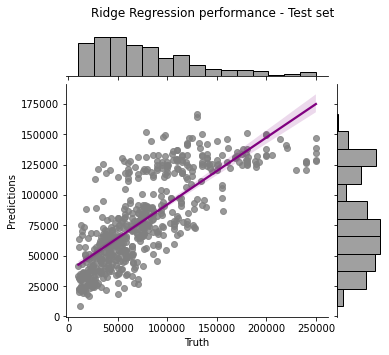

In [24]:
# Create a joint grid and configure the axes for the histograms
g = sns.JointGrid(x=y_test, y=y_pred, height=5)

# Create a scatter plot and fit a linear regression line to the data
g.plot_joint(sns.regplot, scatter_kws={'color': 'grey'}, line_kws={'color': 'purple'})

# Add histograms on the top and right side of the plot
g.plot_marginals(sns.histplot, kde=False, color='grey')

# Adjust the spacing between the subplots and move the title up
g.fig.subplots_adjust(top=0.9)

# Add title
g.fig.suptitle("Ridge Regression performance - Test set")

# Label the axes
g.ax_joint.set_xlabel("Truth")
g.ax_joint.set_ylabel("Predictions")

plt.show()